In [15]:
pip install rdkit-pypi

In [16]:
import os
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import rdchem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import SimilarityMaps
from rdkit.Chem.Draw import IPythonConsole 
from rdkit.Chem.rdmolfiles import SmilesMolSupplier
from rdkit.Chem.Draw.SimilarityMaps import GetMorganFingerprint
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions 
from rdkit.Chem import rdMolDescriptors
from rdkit import DataStructs

In [17]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/GitGears/CYP/CYP_data/inactive10.csv')

# convert SMILES to sdf 
from rdkit.Chem import PandasTools

PandasTools.AddMoleculeColumnToFrame(df,'SMILES','ID') 
PandasTools.WriteSDF(df, 'inactive.sdf', molColName='ID', properties=list(df.columns))


In [18]:
mols = Chem.SDMolSupplier('inactive.sdf')

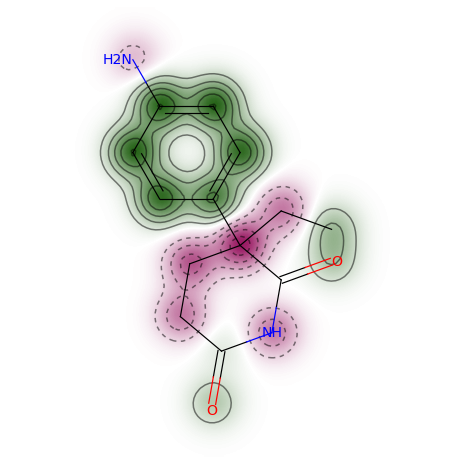

In [24]:
# similarity map
refmol=mols[0]
probemol=mols[4]
fig, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(refmol, probemol, SimilarityMaps.GetMorganFingerprint)

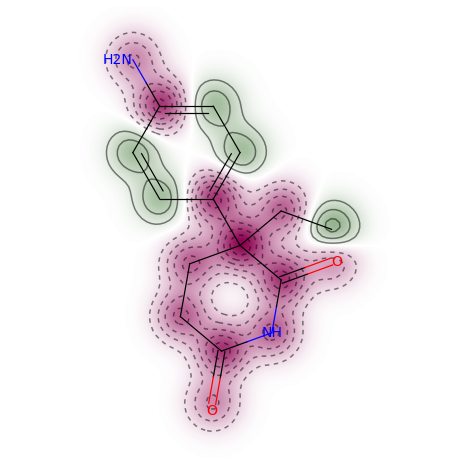

In [23]:
# similarity map enhanced version
refmol=mols[0]
probemol=mols[4]
fig, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(refmol, probemol, lambda m,idx: SimilarityMaps.GetMorganFingerprint(m, atomId=idx, radius=1, fpType='count'), metric=DataStructs.TanimotoSimilarity)